
# Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



In [1262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

In [1263]:
# loading the data and understanding the variables 

bike_df = pd.read_csv('day.csv')
bike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


### Data Inspection

In [1264]:
# Checking the first 5 rows using Head
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1265]:
# Shape of the bike data
bike_df.shape

(730, 16)

In [1266]:
# Describing the columns of the bike data frame
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1267]:
# Informartion of the bike data frame to know type of the column
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1268]:
# we already have yr and month columns. so,dteday in not required
bike_df.drop(['dteday','instant','registered','casual'],axis=1,inplace=True)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


# EDA 

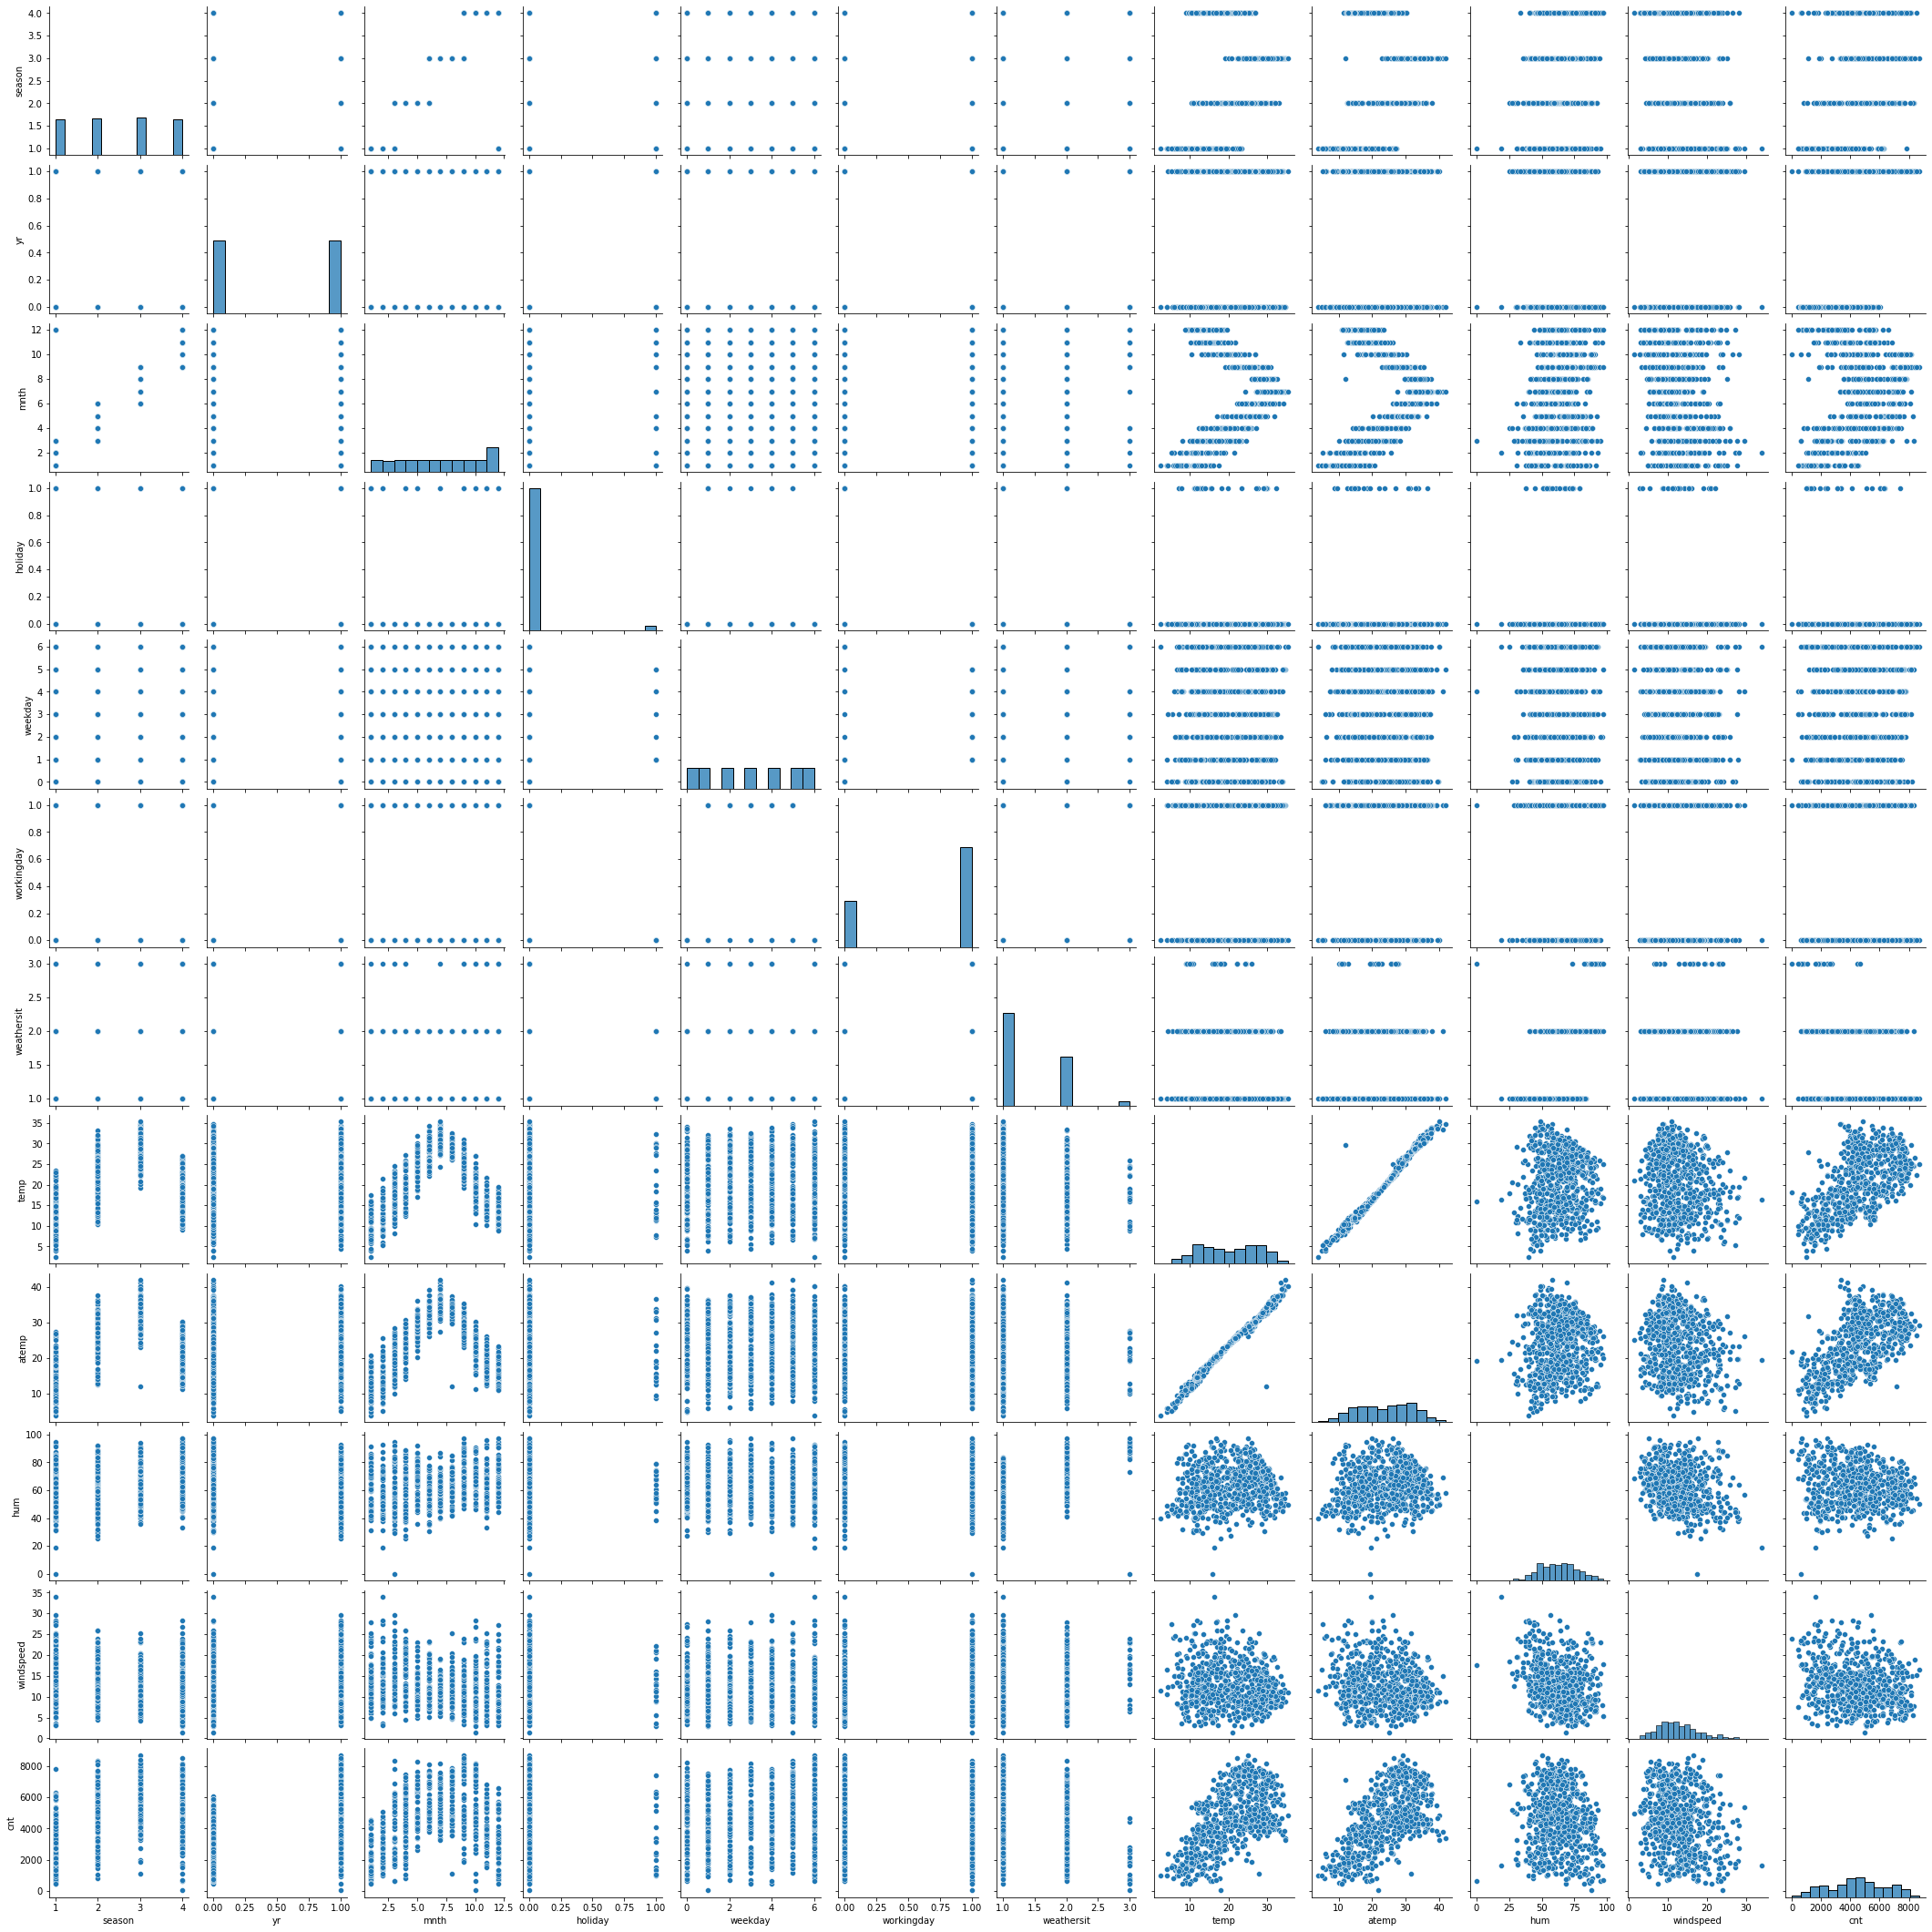

In [1269]:
#visualising the numeric values
sns.pairplot(bike_df)
plt.show()

In [1270]:
#checking the values of the season.
bike_df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [1271]:
# According the data given converting season variable to categorical values.
bike_df['season'] = bike_df[['season']].apply(lambda x : x.map({1:"spring",2:"summer",3:"fall",4:"winter"}))
bike_df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [1272]:
# Conveting numerical value intothe weekday column

bike_df['weekday'] = bike_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [1273]:
# checking the value counts of the weathersit

bike_df['weekday'].value_counts()

sat    105
sun    105
mon    105
tue    104
thu    104
fri    104
wed    103
Name: weekday, dtype: int64

In [1202]:
# checking the value counts of the weathersit
bike_df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [1274]:
# According to the given data converting numerical value into the Categorical variable.
bike_df['weathersit'] = bike_df[['weathersit']].apply(lambda x : x.map({1:"good",2:"moderate",3:"bad",4:"heavy"}))
bike_df['weathersit']

0      moderate
1      moderate
2          good
3          good
4          good
         ...   
725    moderate
726    moderate
727    moderate
728        good
729    moderate
Name: weathersit, Length: 730, dtype: object

In [1204]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [1205]:
# According to the given data converting numerical value into the Categorical variable.
bike_df['mnth'] = bike_df[['mnth']].apply(lambda x : x.map({1:"January",2:"February",3:"March",4:"April",5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}))
bike_df['mnth']

0       January
1       January
2       January
3       January
4       January
         ...   
725    December
726    December
727    December
728    December
729    December
Name: mnth, Length: 730, dtype: object

In [1206]:
# checking the values counts
bike_df['mnth'].value_counts()

January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: mnth, dtype: int64

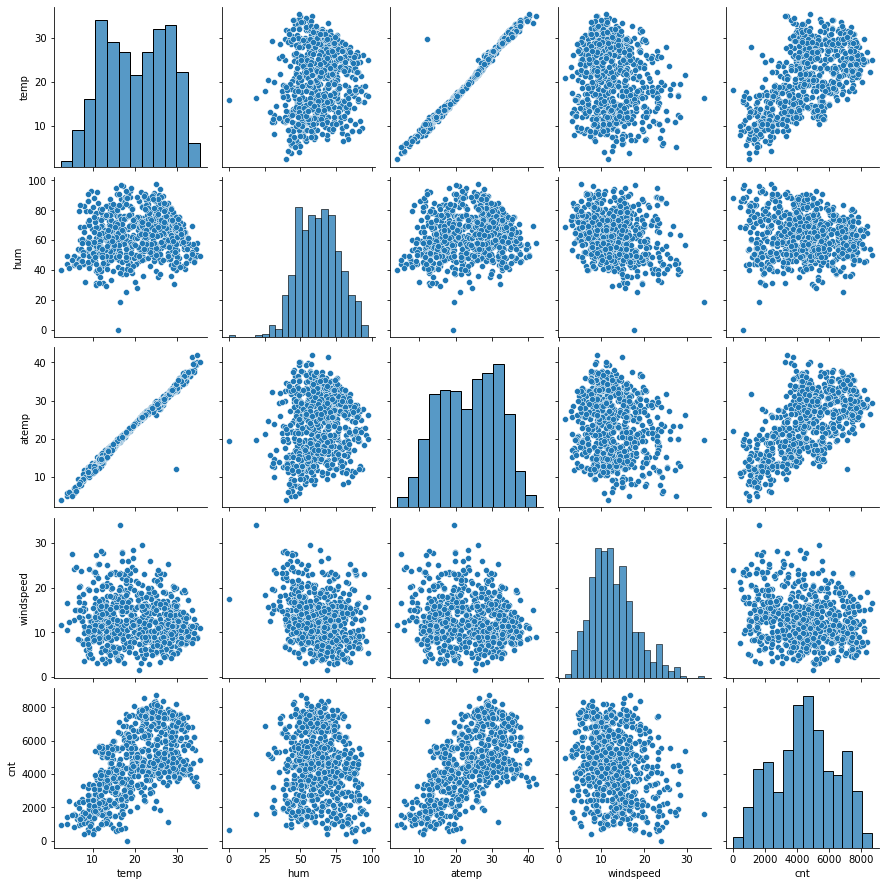

In [1207]:
 #Pairplot of numerical variables

sns.pairplot(bike_df, vars=['temp','hum','atemp','windspeed',"cnt"])
plt.show()

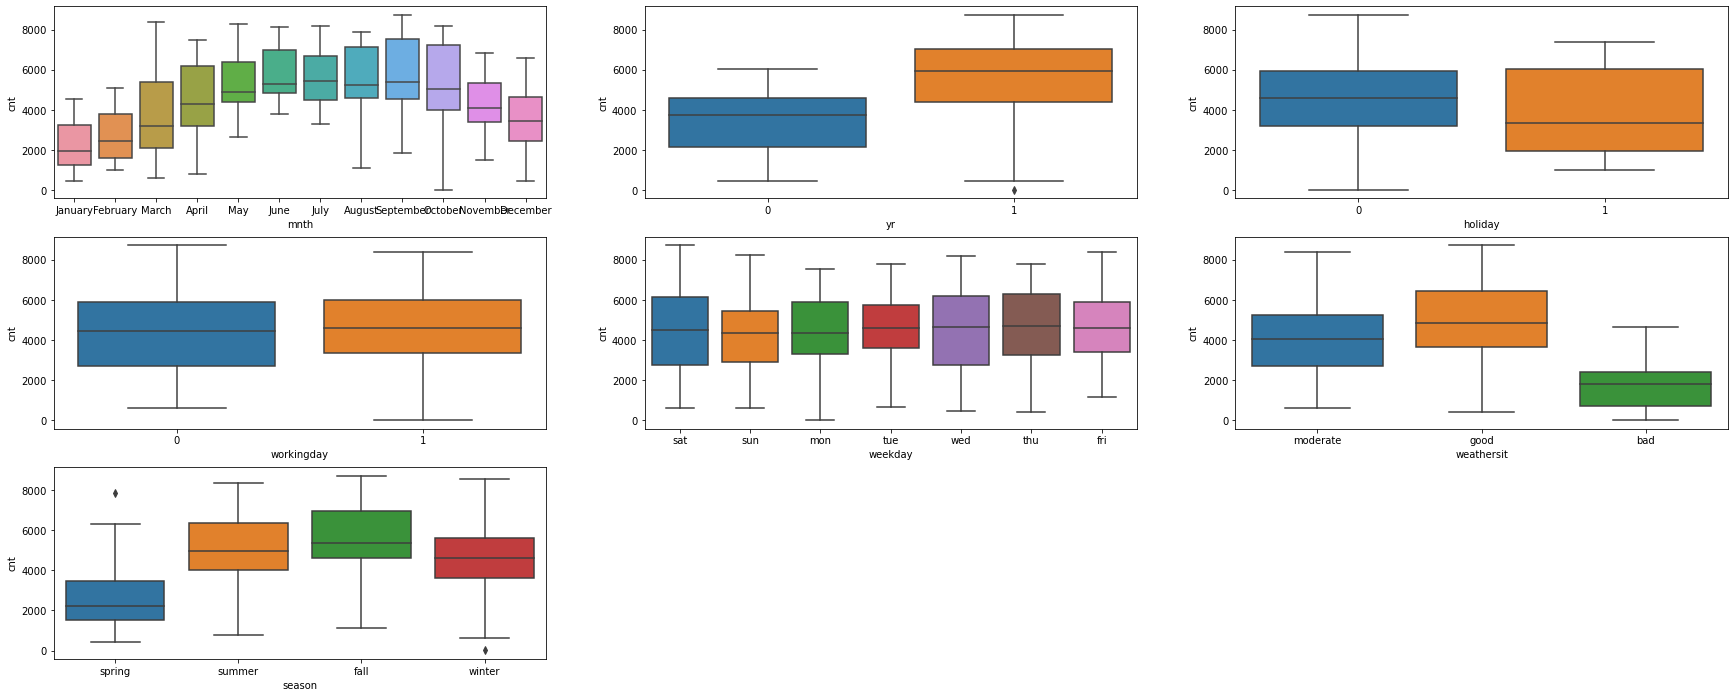

In [1208]:
# Boxplot of categorical variables

plt.figure(figsize=(30, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.show()

### Data Preparation

In [1209]:
# Dummy variable creation for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(bike_df.mnth,drop_first=True)
weekdays_df=pd.get_dummies(bike_df.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike_df.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bike_df.season,drop_first=True)

In [1210]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [1211]:
bike_df=pd.get_dummies(data=bike_df,drop_first=True)

bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,1,0


In [1212]:
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,1,0


In [1213]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_spring        730 non-null    uint8  
 9   season_summer        730 non-null    uint8  
 10  season_winter        730 non-null    uint8  
 11  mnth_August          730 non-null    uint8  
 12  mnth_December        730 non-null    uint8  
 13  mnth_February        730 non-null    uint8  
 14  mnth_January         730 non-null    uint8  
 15  mnth_July            730 non-null    uin

In [1214]:
 # check the shape of new dataframe

bike_df.shape

(730, 30)

In [1215]:
# check the column info of new dataframe 

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_spring        730 non-null    uint8  
 9   season_summer        730 non-null    uint8  
 10  season_winter        730 non-null    uint8  
 11  mnth_August          730 non-null    uint8  
 12  mnth_December        730 non-null    uint8  
 13  mnth_February        730 non-null    uint8  
 14  mnth_January         730 non-null    uint8  
 15  mnth_July            730 non-null    uin

### Training Test Split

In [1216]:
df_train, df_test = train_test_split(bike_df, train_size = 0.7, random_state = 100)

In [1217]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


In [1218]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

### Scaling 

In [1219]:
# normalisation = (x- xmin)/(xmax-xmin)
# standarisation  = (x - mu)/sigma
# 1. Instantiate an object.
scaler = MinMaxScaler()

In [1220]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

bike_vars = ['temp','hum','windspeed','workingday']
df_train[bike_vars] = scaler.fit_transform(df_train[bike_vars])

In [1221]:
df_train.describe(include='all')

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,23.500287,0.650480,0.320883,4485.337255,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.345098
std,0.500429,0.157763,0.468282,0.225858,8.090963,0.145846,0.169803,1950.666077,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,3.953480,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,16.603063,0.538643,0.199179,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,24.131150,0.653714,0.296763,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,30.177700,0.754830,0.414447,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,42.044800,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1222]:
# scaler.fit
df_train[bike_vars]

,temp,hum,windspeed,workingday
576,0.815169,0.725633,0.264686,1.0
426,0.442393,0.640189,0.255342,0.0
728,0.245101,0.498067,0.663106,0.0
482,0.395666,0.504508,0.188475,0.0
111,0.345824,0.751824,0.380981,1.0
...,...,...,...,...
578,0.863973,0.679690,0.187140,1.0
53,0.202618,0.435939,0.111379,1.0
350,0.248216,0.577930,0.431816,0.0
79,0.462664,0.759870,0.529881,1.0


In [1223]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,23.500287,0.650480,0.320883,4485.337255,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.345098
std,0.500429,0.157763,0.468282,0.225858,8.090963,0.145846,0.169803,1950.666077,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,3.953480,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,16.603063,0.538643,0.199179,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,24.131150,0.653714,0.296763,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,30.177700,0.754830,0.414447,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,42.044800,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1224]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
576,1,0,1.0,0.815169,33.1448,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0.0,0.442393,20.6746,0.640189,0.255342,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0.0,0.245101,11.5850,0.498067,0.663106,1796,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0.0,0.395666,18.8752,0.504508,0.188475,4220,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1.0,0.345824,16.0977,0.751824,0.380981,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


In [1225]:
# 2. Fit on data
df_train[bike_vars] = scaler.fit_transform(df_train[bike_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
576,1,0,1.0,0.815169,33.1448,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0.0,0.442393,20.6746,0.640189,0.255342,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0.0,0.245101,11.5850,0.498067,0.663106,1796,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0.0,0.395666,18.8752,0.504508,0.188475,4220,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1.0,0.345824,16.0977,0.751824,0.380981,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


### Training the model

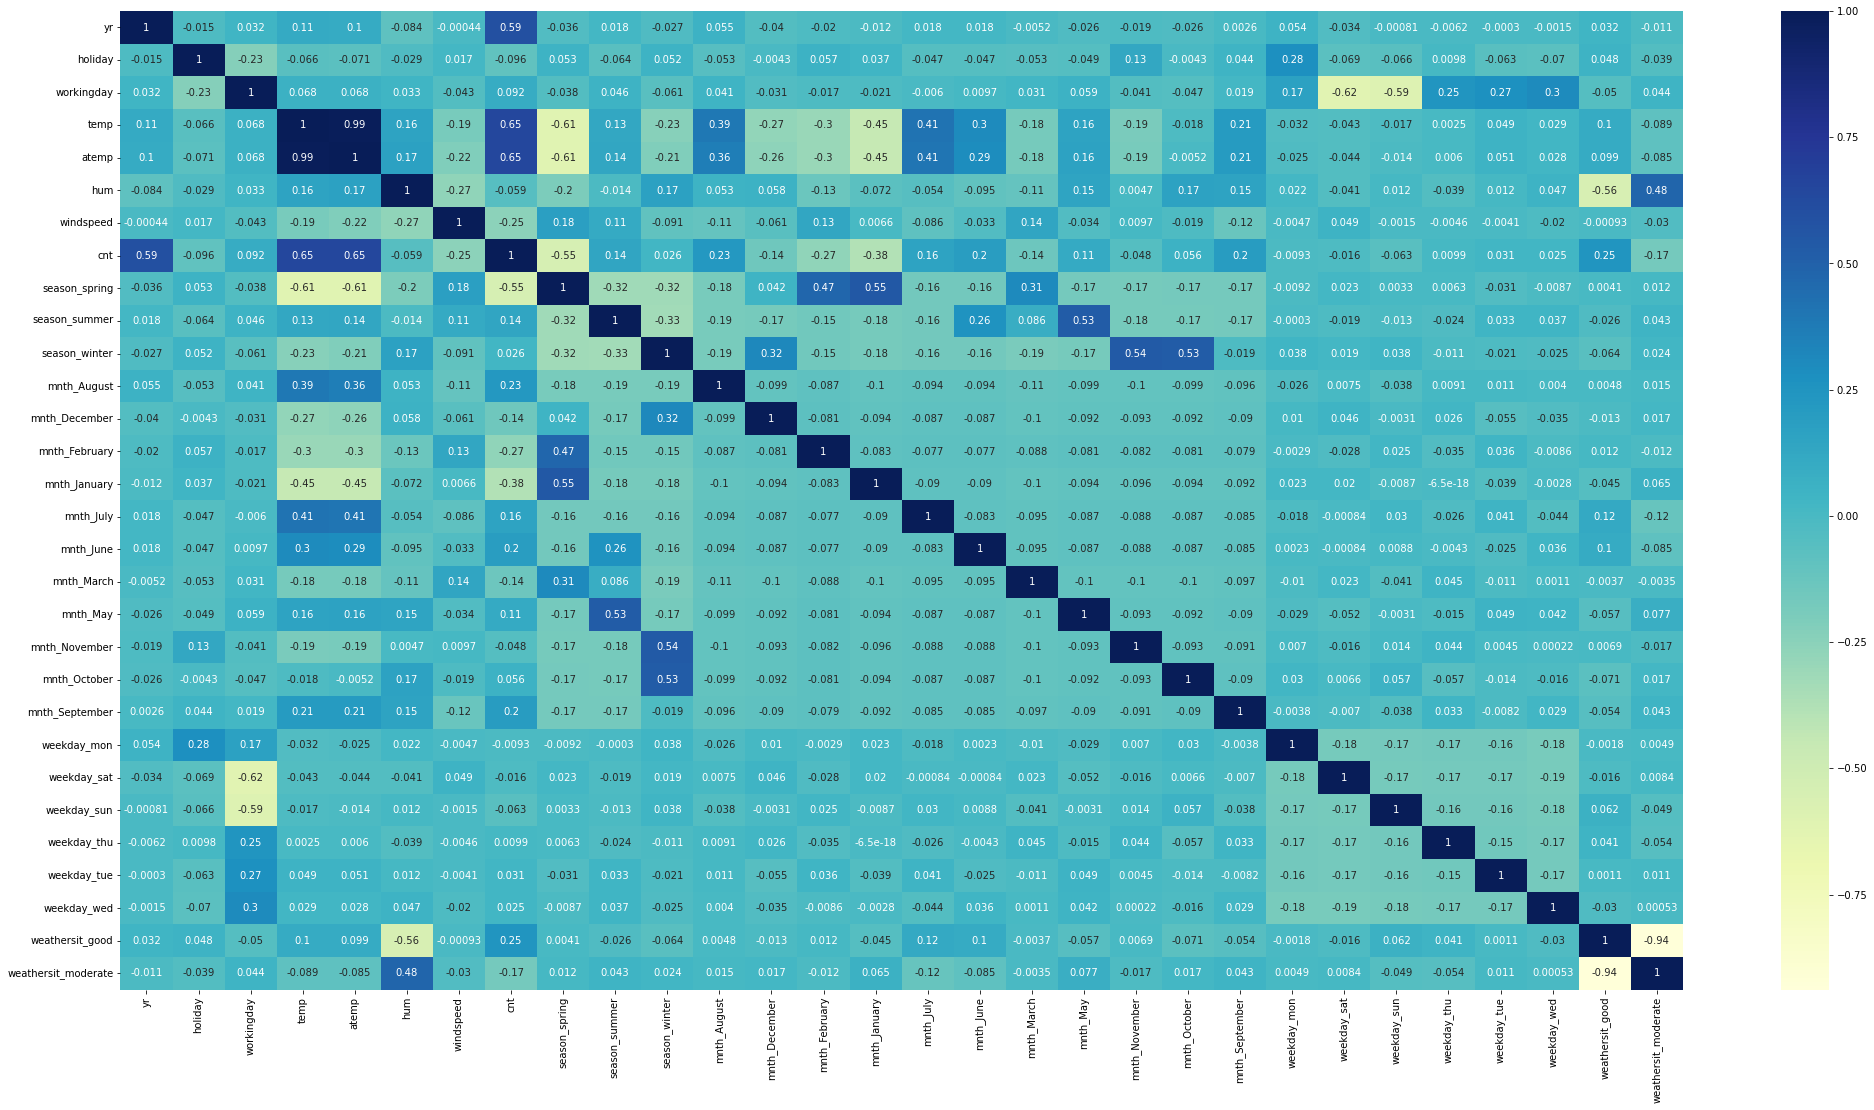

In [1226]:
#heatmap
plt.figure(figsize=(35,18))
sns.heatmap(df_train.corr(),annot = True,cmap = 'YlGnBu')
plt.show()

Observations:
 
The heatmap clearly shows which all the variable are multicollinear in nature, and which variable have high collinearity with the target variable.
We will see this map while building the linear model so as to validate different different correlated values along with VIF & p-value,for identifying the correct variable to select or eliminate from the model.

In [1227]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
576,1,0,1.0,0.815169,33.1448,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0.0,0.442393,20.6746,0.640189,0.255342,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0.0,0.245101,11.5850,0.498067,0.663106,1796,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0.0,0.395666,18.8752,0.504508,0.188475,4220,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1.0,0.345824,16.0977,0.751824,0.380981,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


In [1228]:
# X_train , y_train

y_train = df_train.pop('cnt')
X_train = df_train

In [1229]:
# Build a Lienar Regression model using SKLearn for RFE
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [1230]:
X_train.shape

(510, 29)

In [1231]:
#Cut down number of features to 15 using automated approach
from sklearn.feature_selection import RFE

rfe = RFE(lr,step= 15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), step=15)

In [1232]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_August', False, 2),
 ('mnth_December', True, 1),
 ('mnth_February', False, 2),
 ('mnth_January', True, 1),
 ('mnth_July', False, 2),
 ('mnth_June', False, 2),
 ('mnth_March', False, 2),
 ('mnth_May', False, 2),
 ('mnth_November', True, 1),
 ('mnth_October', False, 2),
 ('mnth_September', True, 1),
 ('weekday_mon', False, 2),
 ('weekday_sat', False, 2),
 ('weekday_sun', False, 2),
 ('weekday_thu', False, 2),
 ('weekday_tue', False, 2),
 ('weekday_wed', False, 2),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [1233]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_December', 'mnth_January',
       'mnth_November', 'mnth_September', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [1234]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_August', 'mnth_February', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_October', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [1235]:
# Taking 10 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_December', 'mnth_January',
       'mnth_November', 'mnth_September', 'weathersit_good',
       'weathersit_moderate']]

In [1236]:
X_train_rfe.shape

(510, 14)

### Build Model


In [1237]:
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          5.38e-188
Time:                        19:22:32   Log-Likelihood:                -4116.3
No. Observations:                 510   AIC:                             8263.
Df Residuals:                     495   BIC:                             8326.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 532.1215    

In [1238]:
vif = pd.DataFrame()
vif['Features']  = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif  = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
2,workingday,133.57
3,temp,66.90
4,atemp,56.03
22,weekday_sat,30.68
23,weekday_sun,29.01
7,season_spring,10.77
27,weathersit_good,10.66
9,season_winter,9.46
28,weathersit_moderate,9.24
8,season_summer,8.29


In [1239]:
#BUILDING MODEL USING STATSMODEL:
import statsmodels.api as sm  

# Adding a constant variable 
X_train_lm1 = sm.add_constant(X_train)

In [1240]:
# Running the linear model
lr1=sm.OLS(y_train,X_train_lm1).fit()

In [1241]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.81e-180
Time:                        19:22:35   Log-Likelihood:                -4098.7
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     481   BIC:                             8378.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 316.7356    384.433      0.824      0.410    -438.640    1072.111
yr                   2021.2265     70.196     28.794      0.000    1883.299    2159.155
holiday              -354.8308    217.301     -1.633      0.103    -781.806      72.145
workingday            387.2985    120.619      3.211      0.001     150.293     624.304
temp                 3372.3586   1236.595      2.727      0.007     942.564    5802.153
atemp                  13.4734     31.591      0.426      0.670     -48.600      75.546
hum                 -1321.3195    335.550     -3.938      0.000   -1980.645    -661.994
windspeed           -1595.8864    229.236     -6.962      0.000   -2046.314   -1145.458
season_spring        -394.2228    260.924     -1.511      0.131    -906.915     118.469
season_summer         368.2736    227.759      1.617      0.107     -79.252     815.799
season_winter         930.7444    243.295      3.826      0.000     452.692    1408.796
mnth_August           193.5713    294.433      0.657      0.511    -384.962     772.104
mnth_December        -384.8315    292.519     -1.316      0.189    -959.605     189.942
mnth_February        -280.8921    286.571     -0.980      0.327    -843.977     282.193
mnth_January         -548.1528    292.204     -1.876      0.061   -1122.307      26.002
mnth_July            -283.8506    304.748     -0.931      0.352    -882.652     314.951
mnth_June              52.2549    217.168      0.241      0.810    -374.460     478.970
mnth_March             13.5128    213.815      0.063      0.950    -406.614     433.639
mnth_May              222.0003    183.818      1.208      0.228    -139.185     583.185
mnth_November        -346.1020    316.564     -1.093      0.275    -968.121     275.918
mnth_October           67.0449    312.229      0.215      0.830    -546.456     680.546
mnth_September        754.1233    278.215      2.711      0.007     207.456    1300.790
weekday_mon          -187.9576    134.168     -1.401      0.162    -451.584      75.669
weekday_sat           377.7691    132.062      2.861      0.004     118.280     637.258
weekday_sun           -93.5011    136.887     -0.683      0.495    -362.471     175.468
weekday_thu           -84.5755    135.742     -0.623      0.534    -351.295     182.144
weekday_tue          -160.2692    135.333     -1.184      0.237    -426.187     105.649
weekday_wed           -51.2569    130.031     -0.394      0.694    -306.756     204.243
weathersit_good      2216.2460    230.125      9.631      0.000    1764.071    2668.421
weathersit_moderate  1698.8931    218.172      7.787      0.000    1270.206    2127.581
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):       

In [1242]:
#dropping the hum variable
X_train_rfe2 = X_train_rfe.drop(["hum"], axis = 1)

In [1280]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe2.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
11,weathersit_good,15.62
2,temp,12.97
12,weathersit_moderate,8.82
3,windspeed,4.65
4,season_spring,4.24
6,season_winter,3.16
5,season_summer,2.42
0,yr,2.08
9,mnth_November,1.89
8,mnth_January,1.73


In [1279]:
# Adding a constant variable  2
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Running the linear model 2
lr2=sm.OLS(y_train,X_train_lm2).fit()

#Let's see the summary of our linear model
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.6
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.23e-185
Time:                        20:06:20   Log-Likelihood:                -4124.7
No. Observations:                 510   AIC:                             8277.
Df Residuals:                     496   BIC:                             8337.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -454.2228    

In [1245]:
# dropping the windspeed variable
X_train_rfe3 = X_train_rfe.drop(["windspeed"], axis = 1)


In [1246]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe3.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,hum,26.26
2,temp,23.34
11,weathersit_good,15.45
12,weathersit_moderate,9.18
4,season_spring,4.96
6,season_winter,4.20
5,season_summer,2.71
0,yr,2.09
9,mnth_November,1.90
8,mnth_January,1.79


In [1278]:
# Adding a constant variable 3
X_train_lm3 = sm.add_constant(X_train_rfe3)

# Running the linear model 3
lr3=sm.OLS(y_train,X_train_lm3).fit()

#Let's see the summary of our linear model
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     180.3
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.13e-178
Time:                        20:06:10   Log-Likelihood:                -4141.9
No. Observations:                 510   AIC:                             8312.
Df Residuals:                     496   BIC:                             8371.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -669.5590    

In [1248]:
# Dropping the temp variable.
X_train_rfe4 = X_train_rfe.drop(["temp"], axis = 1)


In [1249]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe4.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,14.22
11,weathersit_good,9.45
12,weathersit_moderate,7.68
3,windspeed,4.53
6,season_winter,3.13
4,season_spring,2.94
5,season_summer,2.22
0,yr,2.03
9,mnth_November,1.81
8,mnth_January,1.64


In [1250]:
# Adding a constant variable 
X_train_lm4 = sm.add_constant(X_train_rfe4)

# Running the linear model
lr4=sm.OLS(y_train,X_train_lm4).fit()

#Let's see the summary of our linear model
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     144.8
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.11e-159
Time:                        19:22:41   Log-Likelihood:                -4187.1
No. Observations:                 510   AIC:                             8402.
Df Residuals:                     496   BIC:                             8461.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2661.6391    

#### VIF

- High p-value , high VIF drop those variables
#### High-low :
 - High-p, Low-VIF, - remove these first variables
 - Low-p, High-VIF - remove second after the one above VIF's

 ### Resdiual Analaysis

In [1251]:
y_train_pred = lr1.predict(X_train_lm1)
y_train_pred

576    6311.799966
426    4550.988644
728    2947.962575
482    5404.139125
111    2552.932483
          ...     
578    7243.730651
53     2288.979376
350    2491.620378
79     2583.389685
520    5653.871886
Length: 510, dtype: float64

<AxesSubplot:ylabel='Density'>

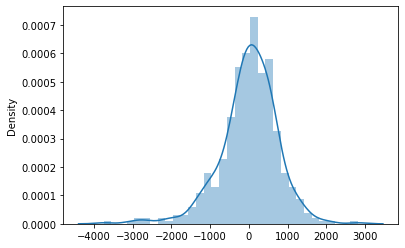

In [1252]:
res = y_train - y_train_pred
sns.distplot(res)

### Predictions and Evaluation on the Test set

In [1275]:
# Making Predictions Using the Final Model

# Apply scaler() to all numeric variables in test dataset.

test_variables = ['temp', 'hum','atemp','windspeed']

df_test[test_variables] = scaler.transform(df_test[test_variables])

In [1254]:
 df_test.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,1,1,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,1,1,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,1,0,0,1,0


In [1255]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,20.808400,24.250312,61.934025,12.598352,4560.559091,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.654545,0.318182
std,0.500809,0.187620,0.459303,7.672796,8.281075,14.429542,4.973534,1904.968544,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.476601,0.466833
min,0.000000,0.000000,0.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.119375,17.090025,51.354200,9.031466,3312.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.790424,24.700000,60.708350,12.188004,4582.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,27.299153,31.124313,72.179375,15.385361,5913.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1256]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   220 non-null    int64  
 1   holiday              220 non-null    int64  
 2   workingday           220 non-null    int64  
 3   temp                 220 non-null    float64
 4   atemp                220 non-null    float64
 5   hum                  220 non-null    float64
 6   windspeed            220 non-null    float64
 7   season_spring        220 non-null    uint8  
 8   season_summer        220 non-null    uint8  
 9   season_winter        220 non-null    uint8  
 10  mnth_August          220 non-null    uint8  
 11  mnth_December        220 non-null    uint8  
 12  mnth_February        220 non-null    uint8  
 13  mnth_January         220 non-null    uint8  
 14  mnth_July            220 non-null    uint8  
 15  mnth_June            220 non-null    u

In [1257]:
y_test

184    6043
535    6211
299    2659
221    4780
152    4968
       ... 
702    6606
127    4333
640    7572
72     2046
653    7534
Name: cnt, Length: 220, dtype: int64

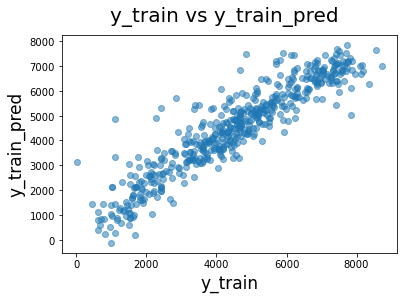

In [1276]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred, alpha=.52)
fig.suptitle('y_train vs y_train_pred', fontsize = 20)             
plt.xlabel('y_train', fontsize = 17)                       
plt.ylabel('y_train_pred', fontsize = 17) 
plt.show()

In [1259]:
from sklearn.metrics import r2_score
r2=r2_score(y_train, y_train_pred)
r2

0.8525995845610338

In [1260]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8301016264150863

##### Conclusion:

Based on the analysis of bike sharing data, it was observed that the linear regression model was able to predict bike demand precisely with an R2 Score of more than 80% i.e., 83%

Significant variables to predict the demand for shared bikes holiday,temp,hum,windspeed,Season(Spring,Summer,Winter),months(January, July, September, November, December),weathersit( Light Snow, Mist Cloudy)
